# Data Preparation

### Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [2]:
#Load the data
data = pd.read_csv("Attrition.csv")

### Exploratory Data Analysis

In [3]:
#Display the top 5 rows of the dataset
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
#Display the number of rows and columns
data.shape

(8186, 24)

In [5]:
#Data type summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8186 entries, 0 to 8185
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               8186 non-null   int64 
 1   Age                       8186 non-null   int64 
 2   Gender                    8186 non-null   object
 3   Years at Company          8186 non-null   int64 
 4   Job Role                  8186 non-null   object
 5   Monthly Income            8186 non-null   int64 
 6   Work-Life Balance         8186 non-null   object
 7   Job Satisfaction          8186 non-null   object
 8   Performance Rating        8186 non-null   object
 9   Number of Promotions      8186 non-null   int64 
 10  Overtime                  8186 non-null   object
 11  Distance from Home        8186 non-null   int64 
 12  Education Level           8186 non-null   object
 13  Marital Status            8186 non-null   object
 14  Number of Dependents    

In [6]:
#Statistical summary
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000
mean,37287.220743,38.615075,15.667237,7336.613609,0.827144,49.724408,1.649890,55.863059
std,21446.665299,12.135169,11.291536,2141.167892,0.996414,28.518282,1.556062,25.546607
min,8.000000,18.000000,1.000000,1855.000000,0.000000,1.000000,0.000000,2.000000
25%,18757.250000,28.000000,7.000000,5714.000000,0.000000,25.000000,0.000000,36.000000
50%,37088.500000,39.000000,13.000000,7373.000000,0.000000,50.000000,1.000000,56.000000
75%,55937.750000,49.000000,23.000000,8879.500000,1.000000,74.000000,3.000000,76.000000
max,74488.000000,59.000000,51.000000,15495.000000,4.000000,99.000000,6.000000,127.000000


### Handling Missing Values

In [7]:
#Get number of duplicated data
data.duplicated().sum()

0

In [8]:
#Get number of empty rows in each column
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          1
Employee Recognition        1
Attrition                   1
dtype: int64

In [9]:
#Drop the empty values
data.dropna(inplace = True)

In [10]:
#verify the empty values are removed
data.isnull().values.any()

False

In [11]:
#Display the count summary for each column
for column in data.columns:
  if data[column].dtype == object:
    print(f"{column}: {data[column].unique()}")
    print(data[column].value_counts())
    print('...........................')

Gender: ['Male' 'Female']
Gender
Male      4500
Female    3685
Name: count, dtype: int64
...........................
Job Role: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Job Role
Technology    2201
Healthcare    1852
Education     1638
Media         1321
Finance       1173
Name: count, dtype: int64
...........................
Work-Life Balance: ['Excellent' 'Poor' 'Good' 'Fair']
Work-Life Balance
Good         3089
Fair         2524
Excellent    1436
Poor         1136
Name: count, dtype: int64
...........................
Job Satisfaction: ['Medium' 'High' 'Very High' 'Low']
Job Satisfaction
High         4100
Very High    1647
Medium       1612
Low           826
Name: count, dtype: int64
...........................
Performance Rating: ['Average' 'Low' 'High' 'Below Average']
Performance Rating
Average          4973
High             1619
Below Average    1196
Low               397
Name: count, dtype: int64
...........................
Overtime: ['No' 'Yes']
Overtime
No     5

### Feature Engineering

In [12]:
#lets convert this attrition to label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Attrition']= le.fit_transform(data['Attrition'])
data.head(20)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,1
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,1
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,1
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,1
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,1
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,No,37,Bachelor’s Degree,Married,0,Mid,Medium,47,No,No,Yes,Fair,High,0
6,64970,47,Male,23,Education,3681,Fair,High,High,1,Yes,75,High School,Divorced,3,Entry,Small,93,No,No,No,Good,Medium,0
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,No,5,Master’s Degree,Married,4,Entry,Medium,88,No,No,No,Excellent,Low,1
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,Yes,39,High School,Married,4,Entry,Medium,75,No,No,No,Fair,Medium,1
9,15944,24,Female,1,Healthcare,7319,Poor,High,Average,1,Yes,57,PhD,Single,4,Entry,Large,45,No,No,Yes,Good,Low,0


In [13]:
stayed = data.Attrition == 0
left = data.Attrition ==1

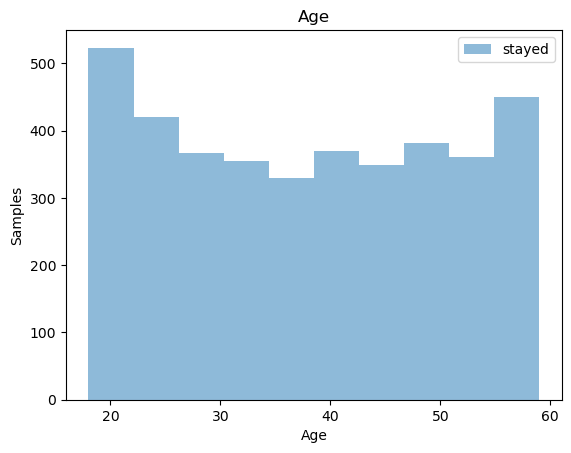

In [14]:
plt.hist(data[stayed].Age, alpha=0.5, label='stayed')
plt.title('Age')
plt.xlabel ('Age')
plt.ylabel('Samples')
plt.legend()
plt.show()

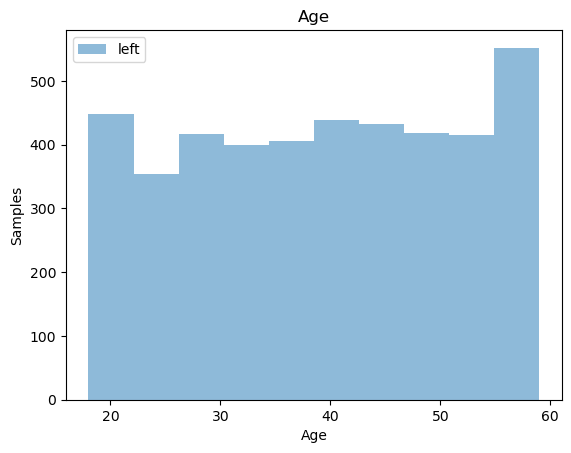

In [15]:
plt.hist(data[left].Age, alpha=0.5, label='left')
plt.title('Age')
plt.xlabel ('Age')
plt.ylabel('Samples')
plt.legend()
plt.show()

In [16]:
le.classes_

array(['Left', 'Stayed'], dtype=object)

In [17]:
Attrition_Employee = le.classes_
print(Attrition_Employee)

['Left' 'Stayed']


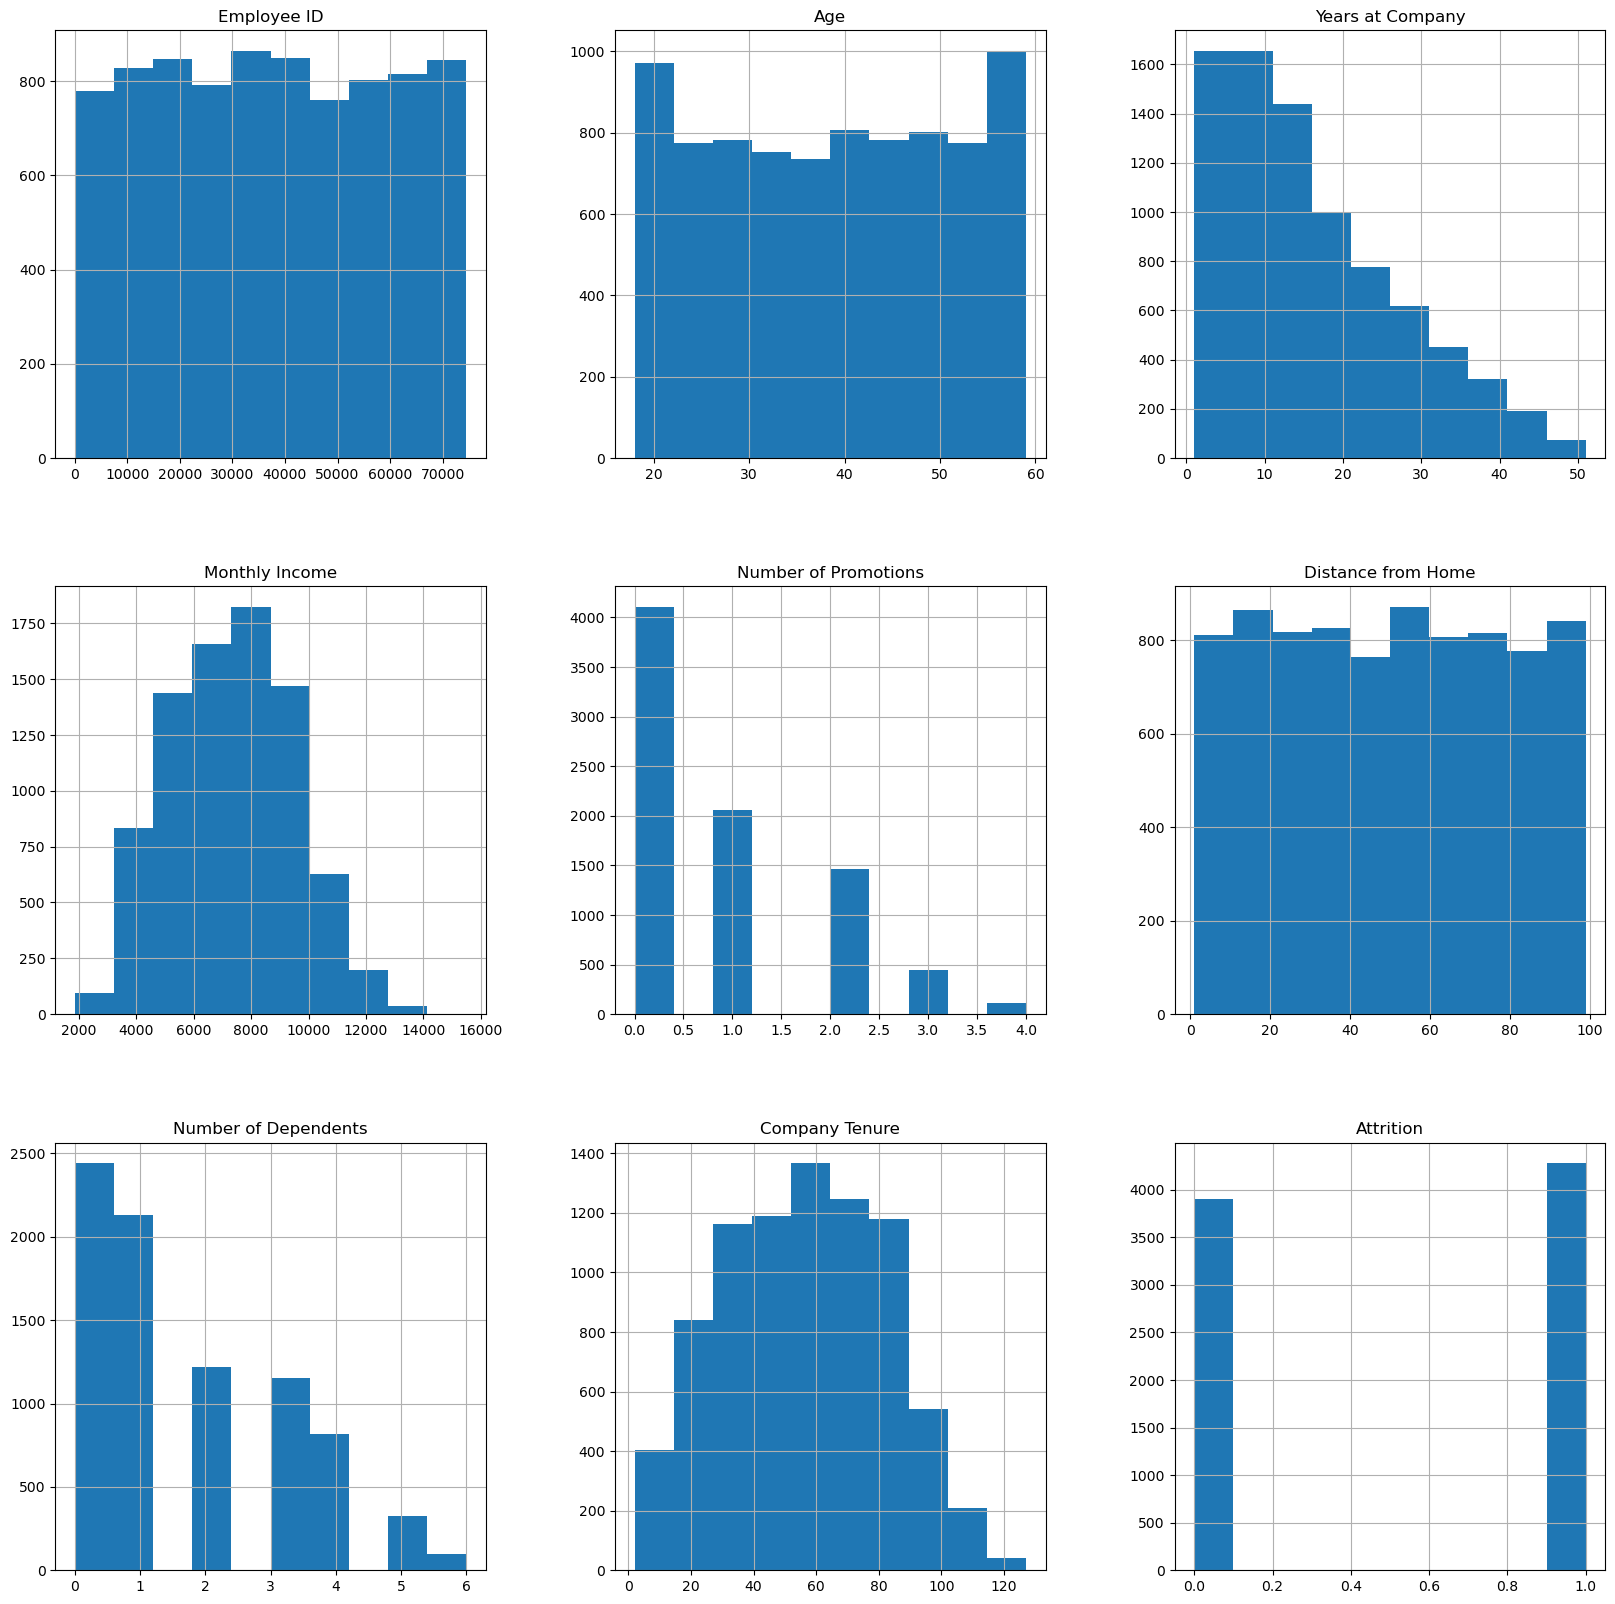

In [18]:
#plotting the distributions
p = data.hist(figsize=(20,20))

Attrition
1    4282
0    3903
Name: count, dtype: int64


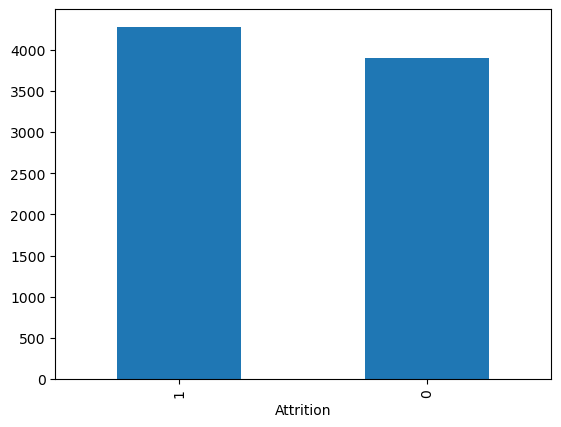

In [19]:
#check the balance of the data by plotting the count of Attrition by their values
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = data["Attrition"].map(lambda x: color_wheel.get(x+1))
print(data.Attrition.value_counts())
p=data.Attrition.value_counts().plot(kind="bar")

In [20]:
#Define the columns to be laebl encoded
labels_cols = ['Gender','Job Role','Overtime','Education Level','Marital Status','Company Size','Remote Work',
              'Leadership Opportunities', 'Innovation Opportunities','Work-Life Balance', 'Job Satisfaction','Performance Rating',
              'Company Reputation','Job Level', 'Employee Recognition']

#initialize label encoders
label_encoders = {col: LabelEncoder() for col in labels_cols}

#Apply the label Encoding
for col in labels_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

In [21]:
data.head(50)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,0,2,0,2,0,22,0,1,0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,5534,3,0,3,3,0,21,3,0,3,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0,0,11,1,1,3,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1,0,27,2,2,2,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0,1,71,2,0,0,2,1,68,0,0,0,1,2,1
5,24368,38,0,3,4,9977,1,0,1,3,0,37,1,1,0,1,1,47,0,0,1,1,0,0
6,64970,47,1,23,0,3681,1,0,2,1,1,75,2,0,3,0,2,93,0,0,0,2,2,0
7,36999,48,1,16,1,11223,0,3,2,2,0,5,3,1,4,0,1,88,0,0,0,0,1,1
8,32714,57,1,44,0,3773,2,2,2,1,1,39,2,1,4,0,1,75,0,0,0,1,2,1
9,15944,24,0,1,2,7319,3,0,0,1,1,57,4,2,4,0,0,45,0,0,1,2,1,0


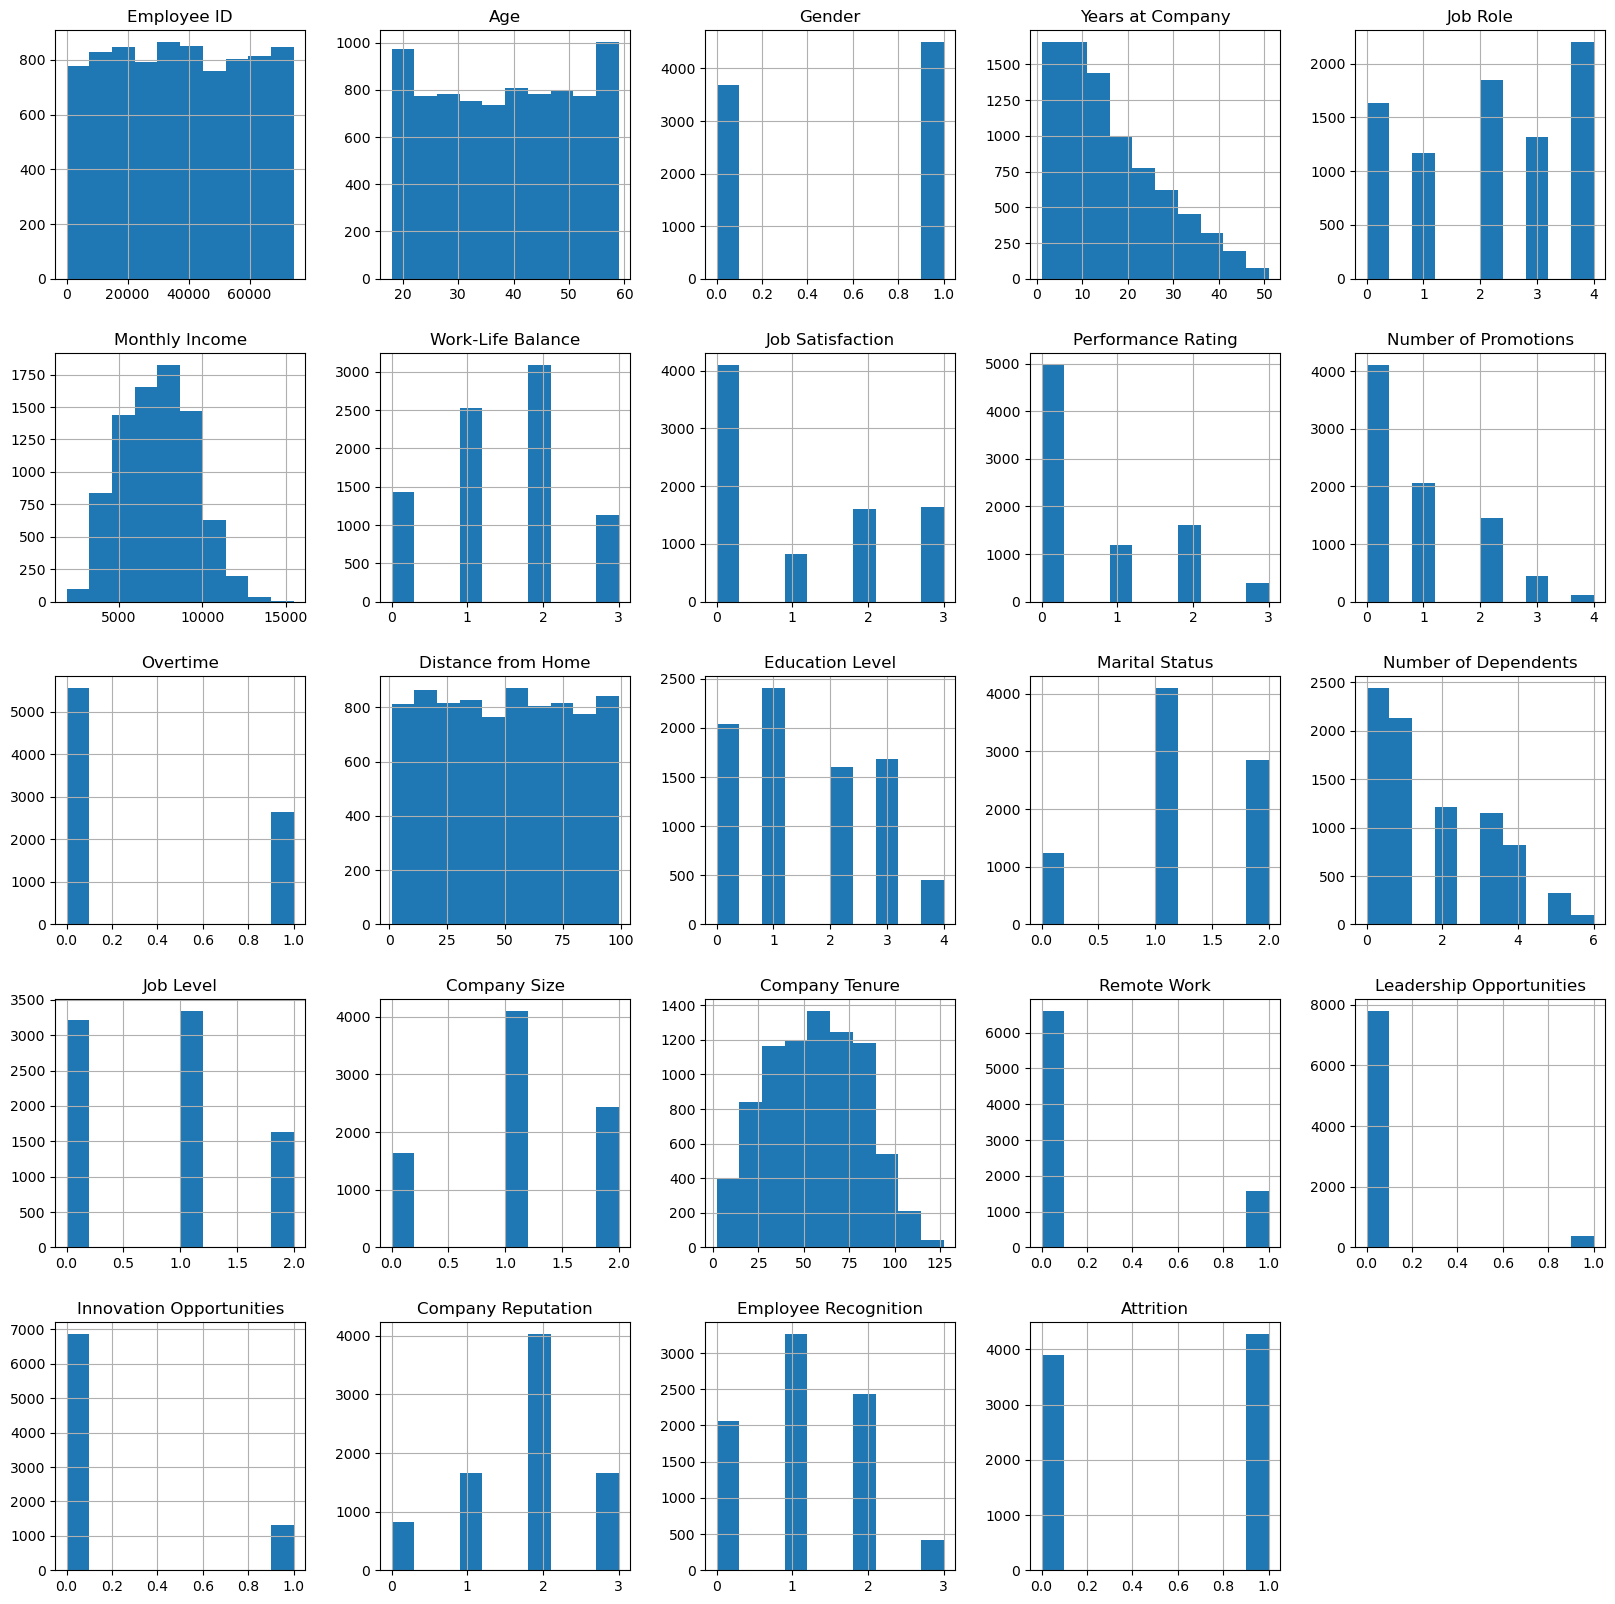

In [22]:
#Distributions for numerical columns
plot1= data.hist(figsize=(20,20))

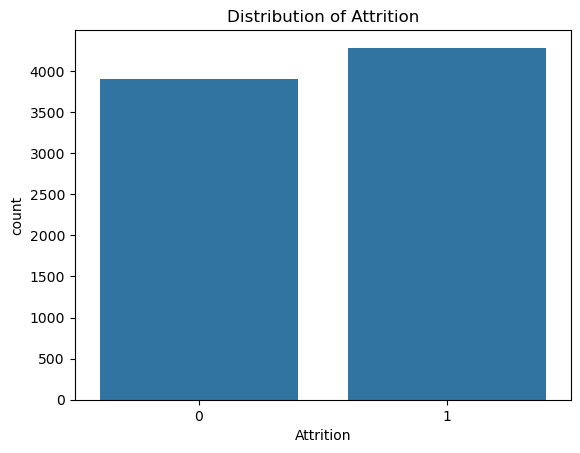

In [23]:
# plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=data)
plt.title('Distribution of Attrition')
plt.show()


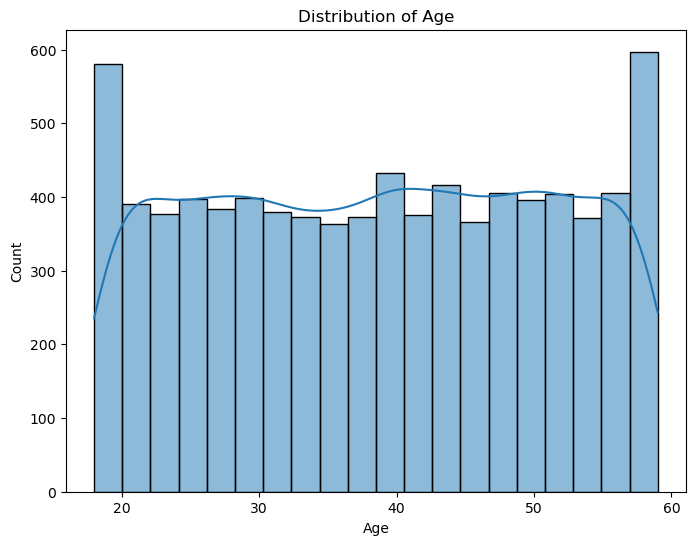

In [24]:
# # Plot the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

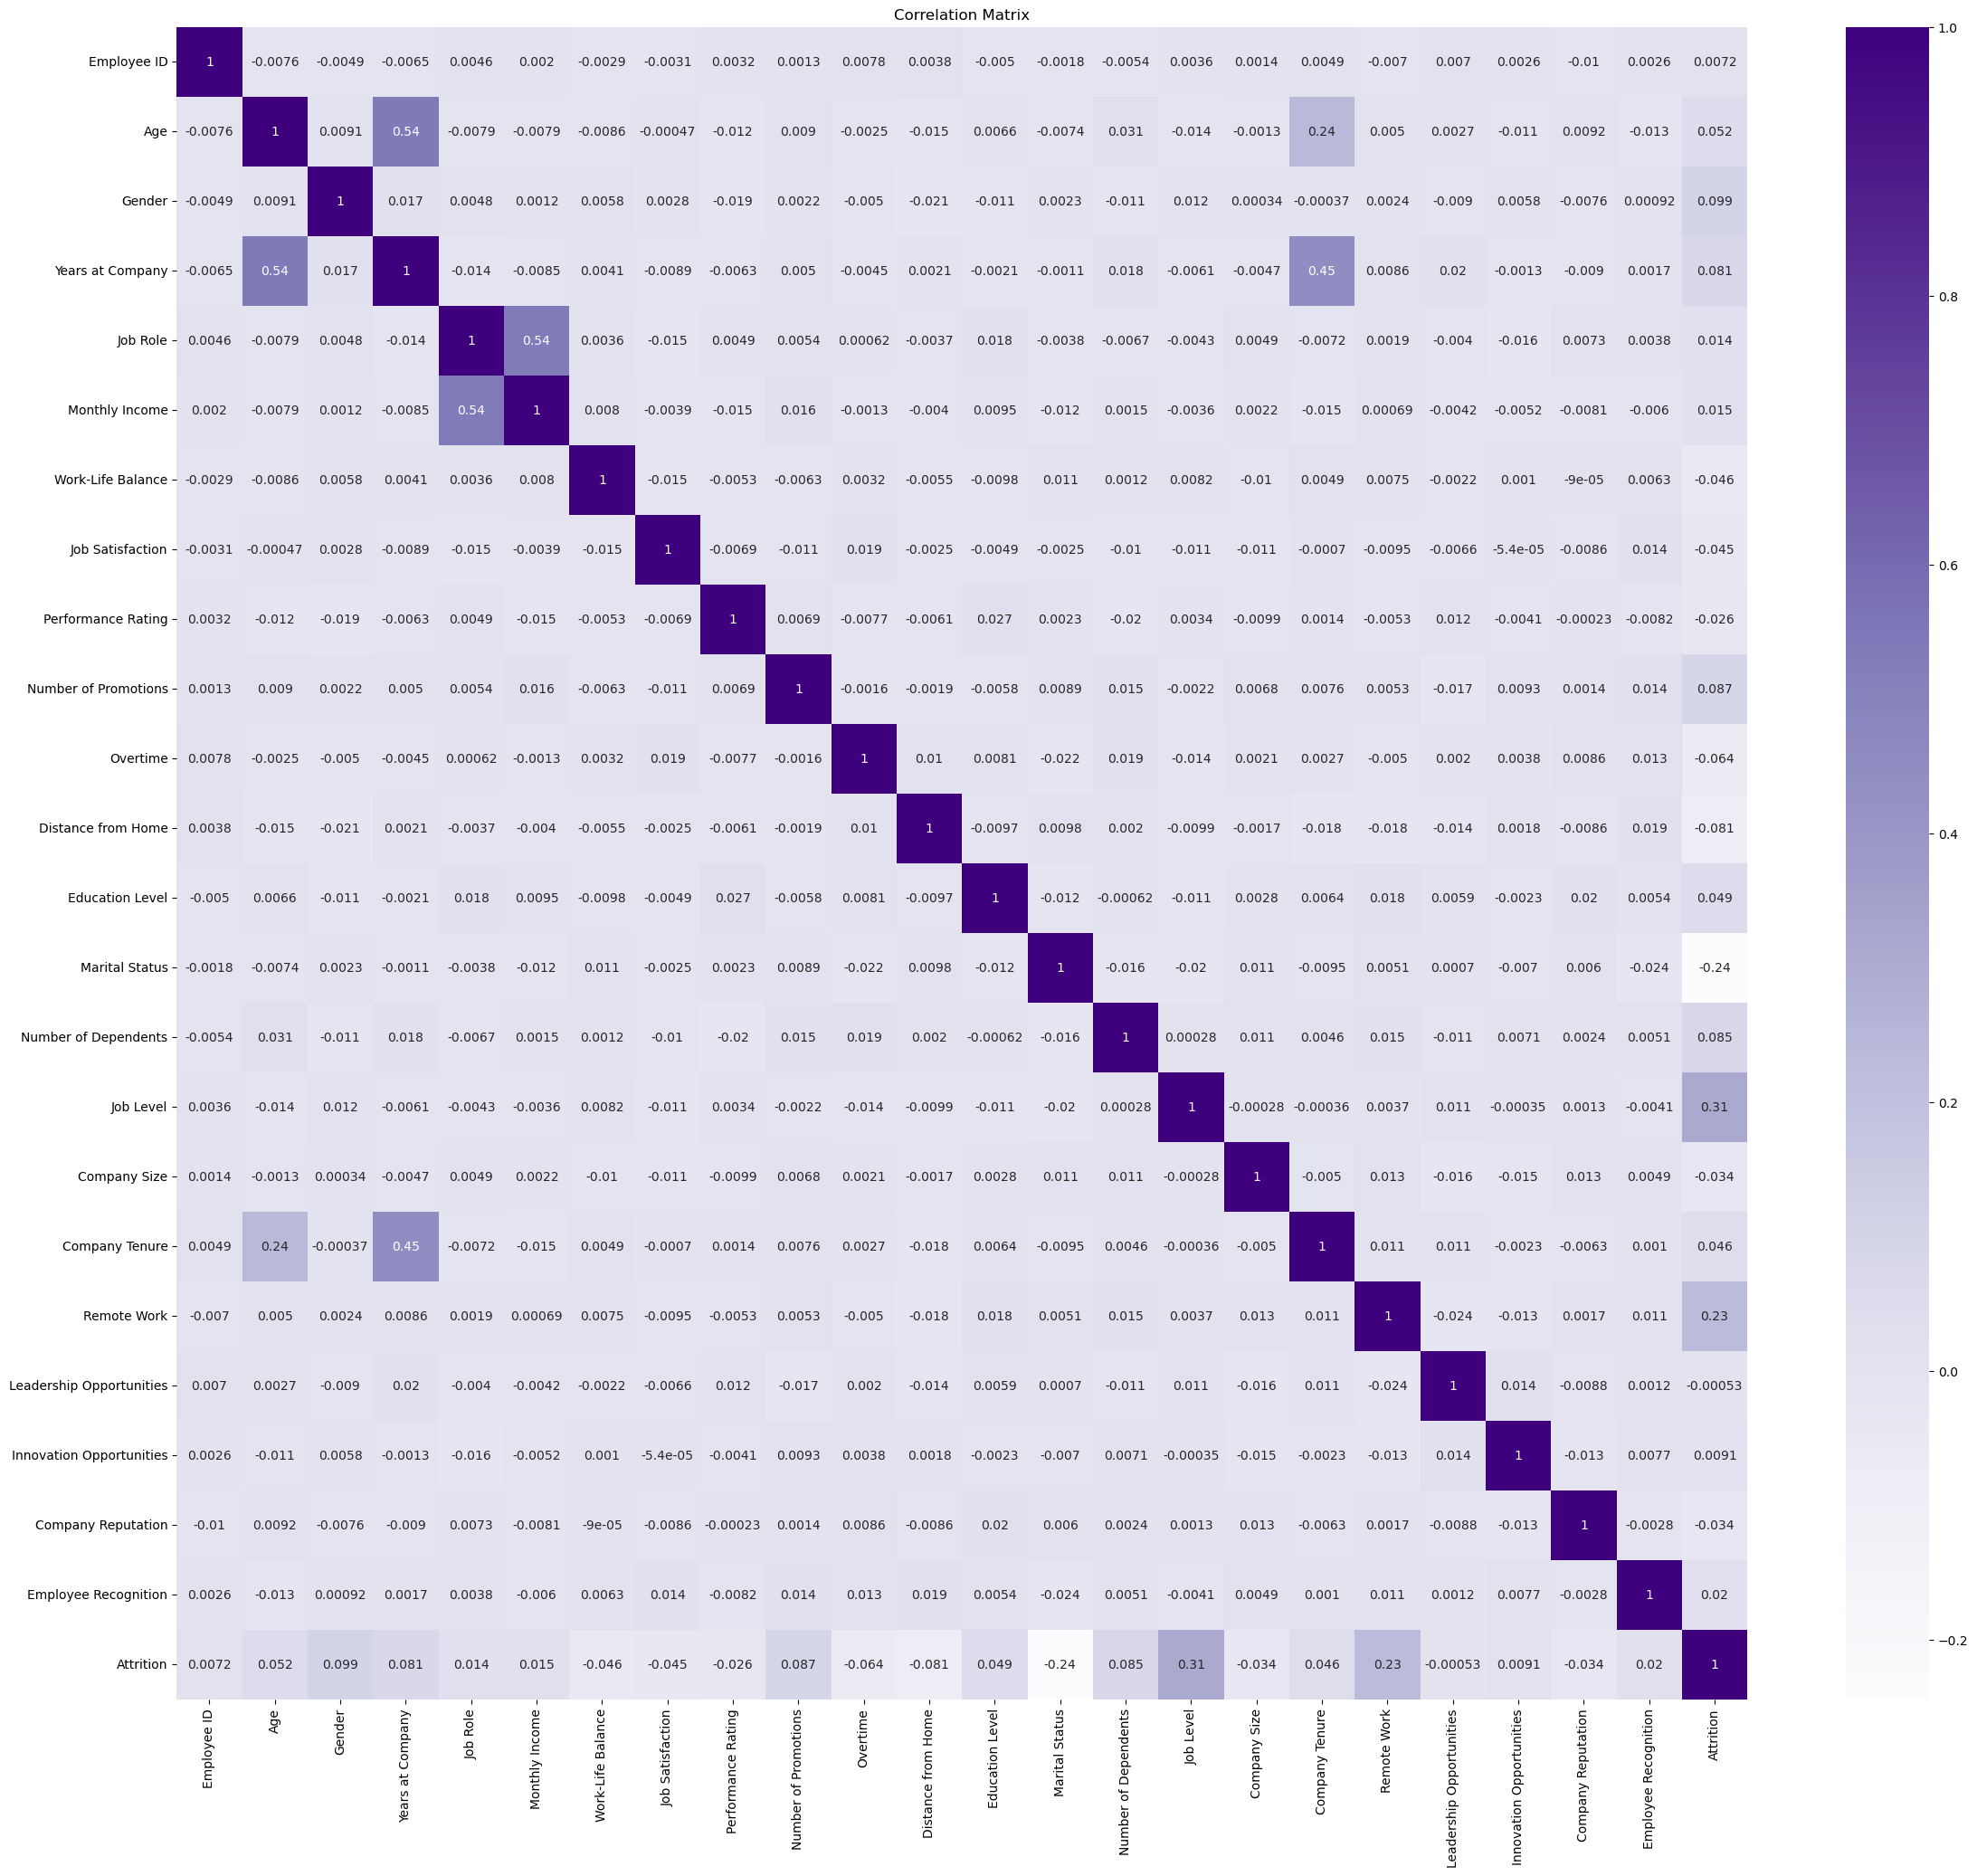

In [25]:
# Correlation matrix
plt.figure(figsize=(28, 24))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Purples')
plt.title('Correlation Matrix')
plt.show()

### Data Splitting

In [26]:
#remove the last column Attrition
x=data.iloc[:, :-1]

In [27]:
x.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,8410,31,1,19,0,5390,0,2,0,2,0,22,0,1,0,1,1,89,0,0,0,0,2
1,64756,59,0,4,3,5534,3,0,3,3,0,21,3,0,3,1,1,21,0,0,0,1,1
2,30257,24,0,10,2,8159,2,0,3,0,0,11,1,1,3,1,1,74,0,0,0,3,1
3,65791,36,0,7,0,3989,2,0,2,1,0,27,2,2,2,1,2,50,1,0,0,2,2
4,65026,56,1,41,0,4821,1,3,0,0,1,71,2,0,0,2,1,68,0,0,0,1,2


In [28]:
y=data.iloc[:,-1]

In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int64

In [30]:
#Libraries
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [32]:
#Displaying the training data
TrainData = x_train.join(y_train)
TrainData.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
3058,52778,56,1,21,0,2798,2,2,0,0,0,24,1,2,2,0,2,34,1,0,0,3,1,1
254,69251,43,1,20,4,10994,2,2,0,2,0,7,4,2,3,0,1,24,0,0,0,1,1,1
3554,62210,55,1,22,4,9403,2,0,1,1,0,51,0,1,1,1,1,51,0,0,0,2,1,1
1403,15430,59,1,26,2,8701,2,3,0,1,1,90,2,1,4,0,2,69,0,0,1,2,0,0
7983,7630,58,1,23,3,5653,1,0,0,0,0,50,1,2,4,2,1,58,0,0,0,2,2,1


In [52]:
#Display all the test data
TestData=x_test.join(y_test)
TestData.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
2799,57355,56,1,8,1,6642,2,2,0,2,0,75,0,1,1,0,1,40,0,0,0,3,1,0
4412,9402,38,0,26,2,8653,2,0,0,2,0,1,0,1,1,1,0,77,0,0,0,2,0,1
6600,31384,43,1,16,2,8388,0,0,2,3,0,65,3,1,1,0,2,50,0,1,0,3,2,1
1639,23522,40,0,23,3,5392,0,2,2,1,0,48,2,2,0,0,2,34,0,0,0,0,1,0
3294,13967,39,1,18,0,4413,0,0,0,0,0,38,1,1,0,2,1,40,0,0,0,0,2,1


In [53]:
# Can rearrange the columns. Optional
column = ['Attrition',
          'Age','Gender',
          'Years at Company',
          'Job Role','Marital Status',
          'Education Level',
          'Job Level',
          'Number of Dependents',
          'Monthly Income',
          'Work-Life Balance',
          'Job Satisfaction','Overtime',
          'Distance from Home','Company Size',
          'Company Tenure','Remote Work',
          'Leadership Opportunities',
          'Innovation Opportunities',
          'Company Reputation',
          'Employee Recognition',
         ]

In [54]:
TrainData=TrainData[column]

In [55]:
TestData=TestData[column[1:]]

### Saving the Train and Test Data

In [56]:
# Saving the trained data
TrainData.to_csv('TrainData.csv', index=False, index_label='Row', header=False)

In [57]:
#Saving the test data
TestData.to_csv('TestData.csv', index=False, index_label='Row', header=False)

### Uploading to S3 Bucket

In [58]:
#Necessary packages
import boto3
import re

In [59]:
bucketName = 'sagemakerteebucket'
TrainFile = r'EmployeeAttritionData/TrainData/TrainData.csv'
TestFile = r'EmployeeAttritionData/TestData/TestData.csv'
ValFile = r'EmployeeAttritionData/ValData/Val.csv'
ModelFolder = r'EmployeeAttritionData/model/'

In [60]:
s3ModelOutput = r's3://{0}/{1}'.format(bucketName,ModelFolder)
s3Train = r's3://{0}/{1}'.format(bucketName,TrainFile)
s3Test = r's3://{0}/{1}'.format(bucketName,TestFile)
s3Val = r's3://{0}/{1}'.format(bucketName,ValFile)

In [61]:
s3ModelOutput

's3://sagemakerteebucket/EmployeeAttritionData/model/'

In [62]:
with open('TrainData.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucketName).Object(TrainFile).upload_fileobj(f)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [63]:
with open('TestData.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucketName).Object(TestFile).upload_fileobj(f)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


### Model Building and Training

In [64]:
import sagemaker
from sagemaker import get_execution_role

In [65]:
sagemakerSess=sagemaker.Session()
role=get_execution_role()

In [66]:
sagemakerSess.boto_region_name

'us-east-1'

In [67]:
ECRdockercontainer=sagemaker.amazon.amazon_estimator.get_image_uri(sagemakerSess.boto_region_name,'linear-learner','latest')

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


### Setting up the hyperparameter for tuning/optimization

In [68]:
LogisticModel=sagemaker.estimator.Estimator(image_uri=ECRdockercontainer,
                                           role=role,
                                            train_instance_count=1,
                                            train_instance_type='ml.m4.xlarge',
                                            output_path=s3ModelOutput,
                                            sagemaker_session=sagemakerSess,
                                            base_job_name = 'Logistic-Tee-v1'
                                           )

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [69]:
LogisticModel.set_hyperparameters(predictor_type='binary_classifier', mini_batch_size=100) 

In [70]:
LogisticModel.hyperparameters()

{'predictor_type': 'binary_classifier', 'mini_batch_size': 100}

In [71]:
trainConfig=sagemaker.session.s3_input(s3_data=s3Train,content_type='text/csv')

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [75]:
LogisticModel.fit({'train':trainConfig})

INFO:sagemaker:Creating training-job with name: Logistic-Tee-v1-2024-08-20-20-32-17-748


2024-08-20 20:32:17 Starting - Starting the training job...
2024-08-20 20:32:34 Starting - Preparing the instances for training...
2024-08-20 20:33:04 Downloading - Downloading input data...
2024-08-20 20:33:40 Downloading - Downloading the training image......
2024-08-20 20:34:46 Training - Training image download completed. Training in progress....Docker entrypoint called with argument(s): train
Running default environment configuration script
[08/20/2024 20:35:09 INFO 140412920104768] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss':

### Deploying the model

In [76]:
#Deploying the Trained Model

predictmodel=LogisticModel.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge',
                                   endpoint_name = 'ThapeloEndpoint')

INFO:sagemaker:Creating model with name: Logistic-Tee-v1-2024-08-20-20-43-30-886
INFO:sagemaker:Creating endpoint-config with name ThapeloEndpoint
INFO:sagemaker:Creating endpoint with name ThapeloEndpoint


--------!